# E-Commerce-Plattformanalyse zur Kundenakquise mittels Machine Learning / Lineare Regression

Der Betreiber eines E-Commerce-Unternehmens vertreibt seine Produkte über App und Website. Seine Fragestellung lautet: Über welche Plattform werden die Kunden besser gewonnen? Diese Information ist notwendig, um die neue Werbekampagne effektiv durchzuführen.

Um diese Frage zu beantworten, sind folgende Schritte auszuführen:

<div>
    
1. **[Datenbeschaffung und -vorbereitung:](#datenbeschaffung-und-vorbereitung)**
    - Sammeln der Daten über Kundenakquise von der App und der Website
    - Bereiten der gesammelten Daten für die Analyse vor, indem sie gereinigt und strukturiert werden

</div>

<div>
    
2. **[Explorative Datenanalyse (EDA):](#explorative-datenanalyse-eda)**
    - Explorative Datenanalyse durchführen, um Einblicke in die Kundenakquisition über die App und die Website zu gewinnen
    - Identifizieren der Muster, Trends oder Unterschiede zwischen den beiden Plattformen

</div>

<div>
    
3. **[Feature Engineering:](#feature-engineering)**
    - Bestimmen der relevanten Merkmale, die für die Analyse von Bedeutung sind
    - Bei Bedarf die Transformationen oder Kombinationen von Merkmalen durchführen, um aussagekräftige Features zu erstellen
    - Korrelationsanalyse

</div>

<div>
    
4. **[Modellbildung mit Machine Learning/Lineare Regression:](#modellbildung-mit-machine-learning-lineare-regression)**
    - Entwickeln des geeigneten Machine Learning-Modells, um die Kundenakquise über die App und die Website vorherzusagen
    - Trainieren des Modells mithilfe der vorbereiteten Daten

</div>

<div>
    
5. **[Modellbewertung und Interpretation:](#modellbewertung-und-interpretation)**
    - Bewertung der Leistung des Modells anhand relevanter Metriken wie Genauigkeit, Präzision und Recall
    - Interpretieren der Ergebnisse, um festzustellen, über welche Plattform die Kunden besser gewonnen werden

</div>

<div>

6. **[Schlussfolgerungen für den Kunden:](#ergebnisse)**
    - Empfehlung basierend auf den Ergebnissen

</div>


<div id="datenbeschaffung-und-vorbereitung"></div>

## 1. Datenbeschaffung und -vorbereitung

Die Daten wurden in Form von CSV von der Firma bereitgestellt. Sie enthalten folgende Spalten: **Email**, **Adress**, **Avatar**, **Avg. Session Length (durchschnittliche Sitzungsdauer)**, **Time on App (Zeit auf App)**, **Time on Website (Zeit auf der Website)**, **Length of Membership (Länge der Mitgliedschaft)** und **Yearly Amount Spent (jährlicher Umsatz pro Kunden)**.

Für die Datenanalyse und die Präsentation im Internet wurden die Spalten **Email**, **Address** und **Avatar** aus verschiedenen Gründen entfernt. Zum einen handelt es sich um kategoriale Werte, die für die Analyse nicht erforderlich sind, und zum anderen aus Gründen des Datenschutzes.

In [5]:
import pandas as pd

# Dateipfad zur CSV-Datei
file_path = 'EcommerceCustomers.csv'

# Daten aus der CSV-Datei lesen
ecommerce_data = pd.read_csv(file_path)

# Die ersten drei Spalten entfernen
ecommerce_data.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

# Neuen Dateipfad für die neue CSV-Datei festlegen
new_file_path = 'EcommerceCustomers_modified.csv'

# Daten in neue CSV-Datei speichern
ecommerce_data.to_csv(new_file_path, index=False)

# Erfolgsmeldung
print("Die neuen Daten wurden in die Datei", new_file_path, "gespeichert.")


Die neuen Daten wurden in die Datei EcommerceCustomers_modified.csv gespeichert.


<div id="explorative-datenanalyse-eda"> </div>

## 2. Explorative Datenanalyse (EDA)

In [6]:
# Importieren der Bibliotheken für die Analyse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Laden der modifizierten E-Commerce-Kundendaten
file_path = 'EcommerceCustomers_modified.csv'
ecommerce_data = pd.read_csv(file_path)
ecommerce_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Der erste Eindruck durch die Analyse mit describe-Methode.

In [8]:
ecommerce_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Basierend auf den Ergebnissen von `describe()` können wir einige vorläufige Bewertungen des Datensatzes vornehmen:
<div>
    
1. **Durchschnittliche Sitzungsdauer**:
   - Die durchschnittliche Sitzungsdauer liegt bei etwa 33 Minuten, was darauf hinweisen könnte, dass die Kunden tendenziell längere Sitzungen auf der Plattform verbringen.

</div>

<div>
    
2. **Zeit auf der App und Zeit auf der Website**:
   - Kunden verbringen im Durchschnitt mehr Zeit auf der Website (etwa 37 Minuten) als auf der App (etwa 12 Minuten). Dies könnte darauf hinweisen, dass die Website für Kunden attraktiver ist oder dass die App möglicherweise Verbesserungspotenzial hat, um die Nutzungsdauer zu erhöhen.
   - Hier sollte man untersuchen, wie hoch der Unterschied zwischen den Ausgaben auf der App und der Website, da dies die primäre Frage des Kunden ist.

</div>

<div>
    
3. **Länge der Mitgliedschaft**:
   - Die durchschnittliche Mitgliedschaftsdauer beträgt etwa 3,5 Jahre, was darauf hindeutet, dass das Unternehmen eine relativ treue Kundenbasis hat. Es könnte interessant sein, zu untersuchen, ob es einen Zusammenhang zwischen der Länge der Mitgliedschaft und den Ausgaben gibt.

</div>

<div>
    
4. **Jährlicher Ausgabenbetrag**:
   - Der durchschnittliche jährliche Ausgabenbetrag liegt bei etwa 499,00 €. Kunden zeigen eine gewisse Variation in ihren Ausgaben, da die Standardabweichung etwa 79,00 € beträgt. Es könnte lohnend sein, die Ausgabenmuster genauer zu untersuchen, um Kundensegmente zu identifizieren und Marketingstrategien zu optimieren.

</div>
    
Diese vorläufigen Bewertungen bieten einen Ausgangspunkt für die Analyse des Datensatzes. Weitere Untersuchungen, wie z. B. Korrelationsanalysen zwischen den Variablen oder die Anwendung von Machine-Learning-Modellen, könnten zusätzliche Einblicke liefern und helfen, fundierte Entscheidungen zu treffen.

<!-- Da die Hauptfrage "Über welche Plattform werden die Kunden besser gewonnen?" ist, werden wir mit Auswertung auf die ....... --/>

### Die info-Methode gibt den Überblick über die Formatierung der Daten

In [9]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<div id="feature-engineering"> </div>

## 3. Feature Engineering

Pairplots können dabei helfen, potenzielle neue Variablen zu identifizieren, die durch Kombination oder Transformation vorhandener Variablen erstellt werden können.

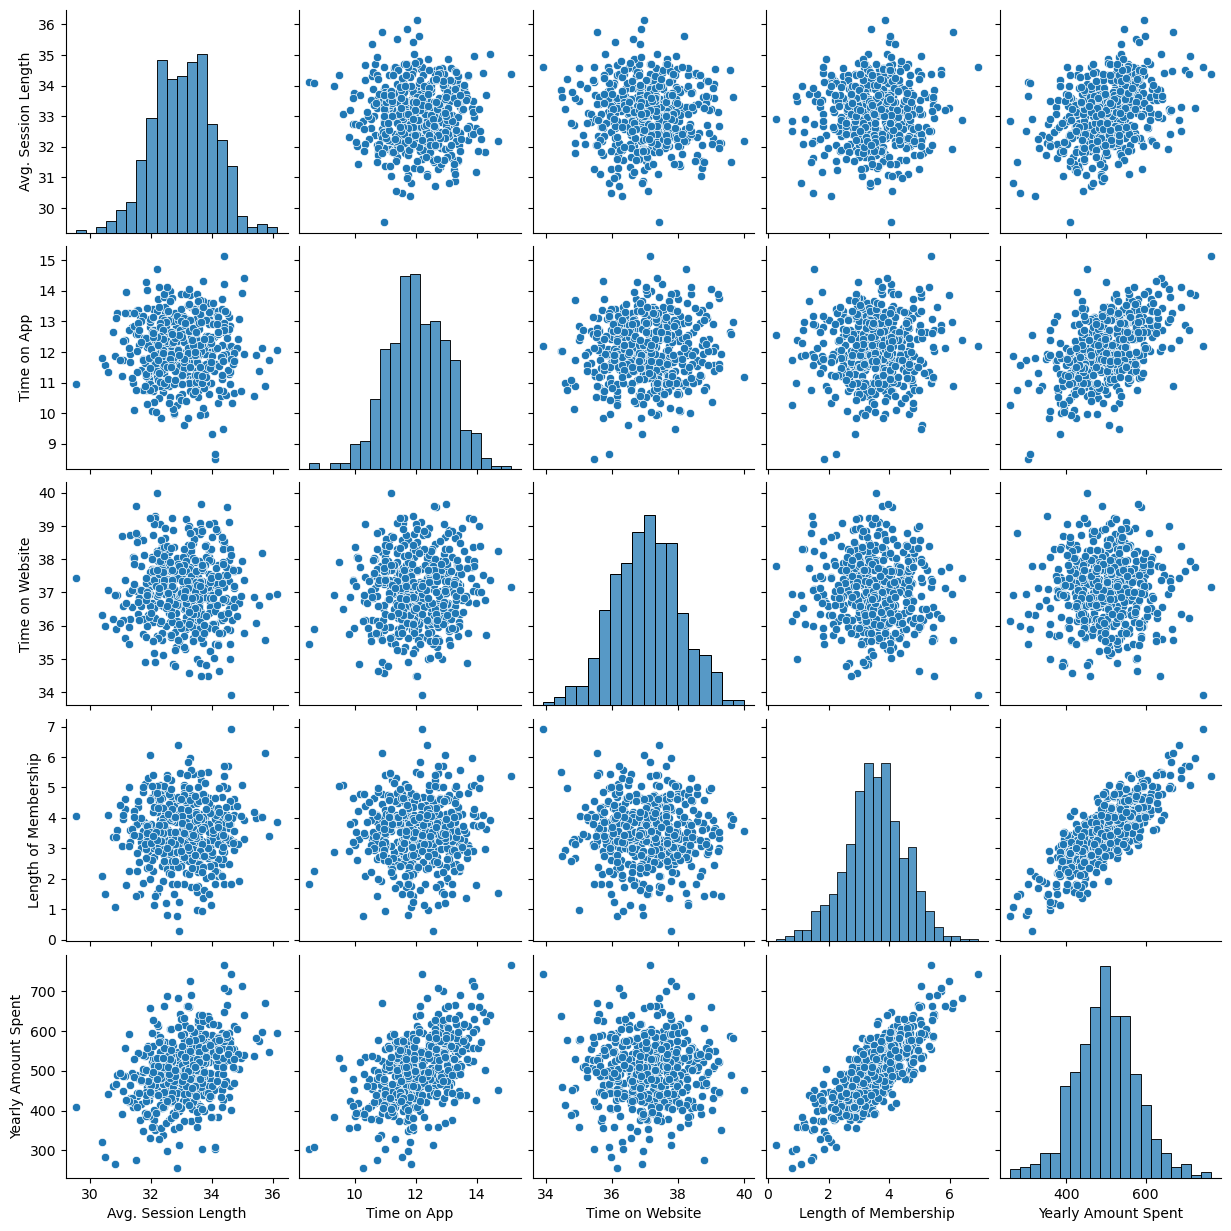

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(ecommerce_data)

Bereits auf den ersten Blick auf die Grafik sehen wir, dass die Feature 'Length of Membership', 'Time on App' gut mit 'Yearly Amount Spent' korrelieren. Für eine genauere Untersuchung wird nun die Korrelationsanalyse angewandt. 


### Korrelationsanalyse
Die Korrelationsanalyse hilft uns zu verstehen, welche Faktoren am stärksten mit den jährlichen Ausgaben korrelieren. Starke positive Korrelationen könnten auf wichtige Bereiche hinweisen, in die investiert werden sollte.

In [11]:
correlation_matrix = ecommerce_data.corr()
correlation_matrix['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

Die Korrelationsanalyse zeigt folgendes:

1. **Länge der Mitgliedschaft (Length of Membership)** hat die stärkste positive Korrelation mit den jährlichen Ausgaben (Yearly Amount Spent) mit einem Korrelationskoeffizienten von etwa 0.81. Dies deutet darauf hin, dass langfristige Mitglieder tendenziell mehr ausgeben.
2. **Zeit auf der App (Time on App)** hat eine moderate positive Korrelation von etwa 0.50. Nutzer, die mehr Zeit in der App verbringen, scheinen also auch mehr auszugeben.
3. **Durchschnittliche Sitzungsdauer (Avg. Session Length)** zeigt eine geringere positive Korrelation von etwa 0.36.
4. **Zeit auf der Website (Time on Website)** zeigt fast keine Korrelation mit den jährlichen Ausgaben (-0.0026), was bedeutet, dass es keinen klaren Zusammenhang zwischen der Zeit auf der Website und den Kundenumsätzen gibt.

### Zur Veranschaulichung werden hier nun einzelne Korrelationen inkl. der Regressionslinie als Grafiken dargestellt:

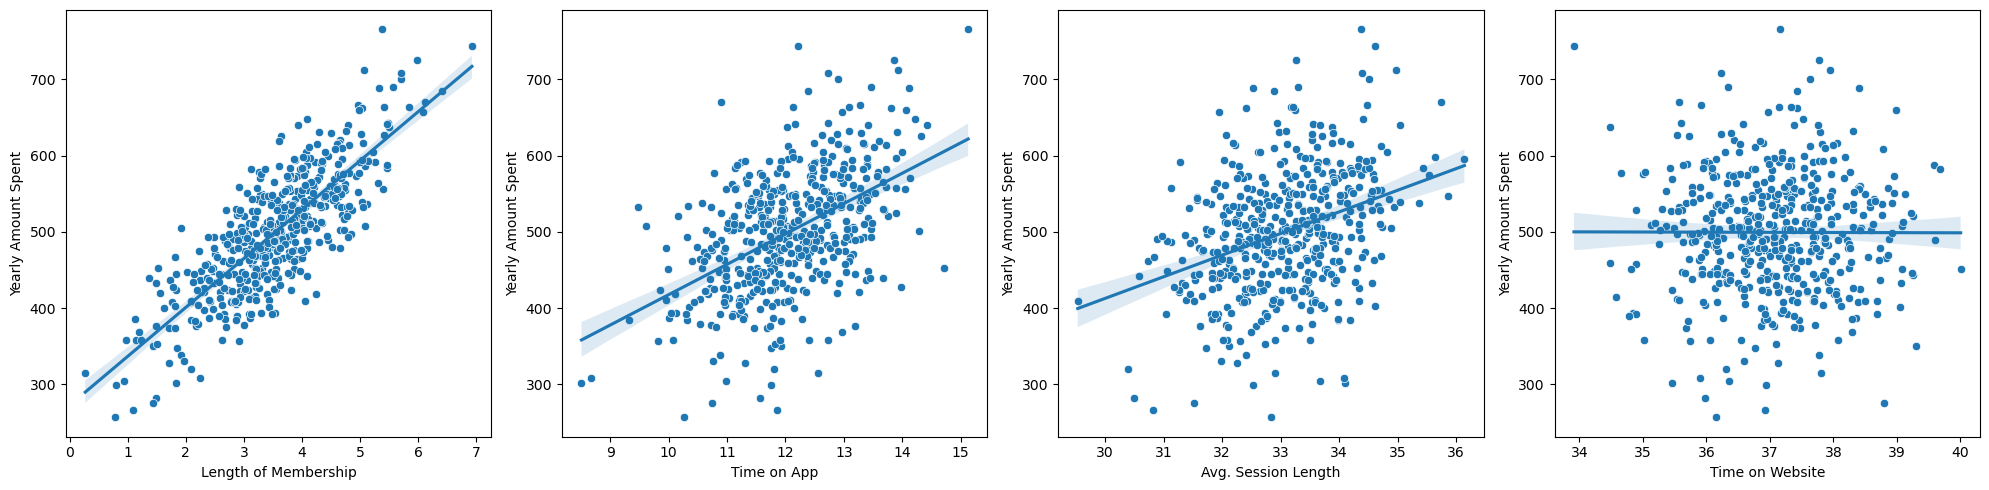

In [12]:
# Eine Figure und Axes erstellen
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Die Plots nebeneinander zeichnen
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=ecommerce_data, ax=axes[0])
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=ecommerce_data, ax=axes[1])
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=ecommerce_data, ax=axes[2])
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=ecommerce_data, ax=axes[3])

# Hinzufügen der Regressionslinien
sns.regplot(x='Length of Membership', y='Yearly Amount Spent', data=ecommerce_data, scatter=False, ax=axes[0])
sns.regplot(x='Time on App', y='Yearly Amount Spent', data=ecommerce_data, scatter=False, ax=axes[1])
sns.regplot(x='Avg. Session Length', y='Yearly Amount Spent', data=ecommerce_data, scatter=False, ax=axes[2])
sns.regplot(x='Time on Website', y='Yearly Amount Spent', data=ecommerce_data, scatter=False, ax=axes[3])

# Plots anzeigen
plt.tight_layout()
plt.show()

<div id="modellbildung-mit-machine-learning-lineare-regression"></div>


## 4. Modellbildung mit linearer Regression

Als Nächstes werde ich ein lineares Regressionsmodell erstellen, um zu untersuchen, wie gut wir die jährlichen Ausgaben basierend auf diesen Features vorhersagen können.

In [13]:
# Laden der notwendigen Bibliotheken
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

Erstellung eines linearen Regressionsmodells zur Vorhersage der jährlichen Ausgaben:

In [17]:
# Auswahl der Features und des Targets
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
target = 'Yearly Amount Spent'

# Aufteilung in Trainings- und Testdaten
X = ecommerce_data[features]
y = ecommerce_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hinzufügen einer Konstanten zu den Features (für den Intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Modelltraining mit statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Vorhersagen auf Testdaten
predictions = model.predict(X_test_const)

<div id="modellbewertung-und-interpretation">

## 5. Modellbewertung und Interpretation

In [18]:
# Bewertung des Modells
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Modellzusammenfassung
model_summary = model.summary()

# Ausgabe der Modellbewertung und der Koeffizienten
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")
print(model_summary)

MAE: 8.426091641432325
MSE: 103.91554136503656
RMSE: 10.193897260863313
R^2: 0.9808757641125849
                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Fri, 17 May 2024   Prob (F-statistic):          3.46e-315
Time:                         12:28:51   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

### Interpretation der statistischen Ergebnisse

**1. Signifikanz der Koeffizienten:**

<div>
    
**Avg. Session Length:**

- Koeffizient: 25.7243
- Standardfehler: 0.534
- t-Statistik: 48.137
- p-Wert: 0.000
- **Interpretation:** Sehr signifikant (p < 0.05). Eine Erhöhung der durchschnittlichen Sitzungsdauer um eine Einheit ist mit einer Erhöhung der jährlichen Ausgaben um etwa 25.72 Einheiten verbunden.

</div>

<div>

**Time on App:**

- Koeffizient: 38.5971
- Standardfehler: 0.528
- t-Statistik: 73.045
- p-Wert: 0.000
- Sehr signifikant (p < 0.05). Eine Erhöhung der Zeit auf der App um eine Einheit ist mit einer Erhöhung der jährlichen Ausgaben um etwa 38.60 Einheiten verbunden.

</div>

<div>

**Time on Website:**

- Koeffizient: 0.4591
- Standardfehler: 0.520
- t-Statistik: 0.884
- p-Wert: 0.377
- Nicht signifikant (p > 0.05). Eine Erhöhung der Zeit auf der Website um eine Einheit hat keinen statistisch signifikanten Einfluss auf die jährlichen Ausgaben.

</div>

<div>

**Length of Membership:**

- Koeffizient: 61.6747
- Standardfehler: 0.516
- t-Statistik: 119.540
- p-Wert: 0.000
- Sehr signifikant (p < 0.05). Eine Erhöhung der Länge der Mitgliedschaft um eine Einheit ist mit einer Erhöhung der jährlichen Ausgaben um etwa 61.67 Einheiten verbunden.

</div>

**2. Bestimmtheitsmaß (R²) und Anpassungsgüte:**

<div>

- **R²:** 0.985
  - Das Modell erklärt 98.5% der Varianz der jährlichen Ausgaben, was auf eine sehr gute Modellanpassung hinweist.

</div>

<div>

- **Adjusted R²:** 0.985
  - Das adjustierte R² berücksichtigt die Anzahl der Prädiktoren im Modell und zeigt ebenfalls eine sehr gute Anpassung.

</div>

**3. Modellqualität und Multikollinearität:**

<div>

- **F-Statistik:** 5825
  - Ein sehr hoher F-Wert und ein extrem niedriger p-Wert (3.46e-315) deuten darauf hin, dass das Modell insgesamt signifikant ist.
- **Condition Number:** 2.56e+03
  - Ein hoher Konditionswert könnte auf Multikollinearität hinweisen. Dies könnte ein Zeichen dafür sein, dass einige der unabhängigen Variablen stark miteinander korrelieren, was die Schätzung der Regressionskoeffizienten beeinflussen kann.

</div>

<div id="ergebnisse"></div>

<div id="ergebnisse"></div>

## 6. Schlussfolgerungen für den Kunden

<div>

Basierend auf den oben genannten Ergebnissen hat die **Länge der Mitgliedschaft** den stärksten positiven Einfluss auf den jährlichen Umsatz, gefolgt von der **Zeit auf der App**.

</div>

<div>

Die **Zeit auf der Website** hat keinen signifikanten Einfluss auf den jährlichen Umsatz.

</div>

Die am Anfang gestellte Frage lautet: "Über welche Plattform werden die Kunden besser gewonnen?" für die effektive Durchführung der Werbekampagne.

<div>

Die Ergebnisse der Untersuchung legen nahe, dass Investitionen zur Steigerung der Nutzerbindung und des App-Engagements eine höhere Priorität haben sollten als die Zeit, die auf der Website verbracht wird, um die jährlichen Umsätze zu erhöhen. Dies wird durch die signifikanten Koeffizienten für die **Länge der Mitgliedschaft** und die **Zeit auf der App** unterstützt.

</div>

<div>

Möglicherweise ist es wichtig zu klären, warum die Nutzung der Website keinen signifikanten Einfluss auf den Umsatz hat. Es könnte sein, dass beispielsweise die schlechte Usability der Website dazu führt, dass Nutzer zwar viel Zeit auf der Website verbringen, allerdings nicht dazu bewegt werden, einen Kauf zu tätigen. Eine detaillierte Analyse der Website-Nutzung und -Usability könnte hierbei weitere Erkenntnisse liefern.

</div>
